In [98]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
import dlib

In [99]:
detector = dlib.get_frontal_face_detector() #Face detector
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [100]:
data = pd.read_csv('data/fer2013.csv')

In [101]:
N = 1000
D = data.head(N)
data.groupby('Usage').count()

,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


In [102]:
training_image = []
training_label = []
test_image = []
test_label = []


for index, row in D.iterrows():
    if row['Usage'] == 'Training':
        training_image.append(np.reshape(np.array(row['pixels'].split(), dtype=np.uint8), (48, 48)))
        training_label.append(row['emotion'])
    else:
        test_image.append(np.reshape(np.array(row['pixels'].split(), dtype=np.uint8), (48, 48)))
        test_label.append(row['emotion'])

In [103]:
def get_landmarks(image):
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
            
        xmean = np.mean(xlist) #Get the mean of both axes to determine centre of gravity
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist] #get distance between each point and the central point in both axes
        ycentral = [(y-ymean) for y in ylist]

        if xlist[26] == xlist[29]: #If x-coordinates of the set are the same, the angle is 0, catch to prevent 'divide by 0' error in function
            anglenose = 0
        else:
            anglenose = int(math.atan((ylist[26]-ylist[29])/(xlist[26]-xlist[29]))*180/math.pi)

        if anglenose < 0:
            anglenose += 90
        else:
            anglenose -= 90

        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(x)
            landmarks_vectorised.append(y)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            anglerelative = (math.atan((z-ymean)/(w-xmean))*180/math.pi) - anglenose
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append(anglerelative)

    if len(detections) < 1: 
        landmarks_vectorised = "error"
    return landmarks_vectorised

In [106]:
def make_sets():
    training_data = []
    test_data = []
    
    #Append data to training and prediction list, and generate labels 0-7
    for item in training_image:
        # image = cv.imread(item) #open image
        # gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #convert to grayscale
        # clahe_image = clahe.apply(gray)
        landmarks_vectorised = get_landmarks(item)
        if landmarks_vectorised == "error":
            pass
        else:
            training_data.append(landmarks_vectorised) #append image array to training data list

    for item in test_image:
        # image = cv.imread(item)
        # gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        # clahe_image = clahe.apply(gray)
        landmarks_vectorised = get_landmarks(item)
        if landmarks_vectorised == "error":
            pass
        else:
            test_data.append(landmarks_vectorised)

    return training_data, test_data

train_data, test_data = make_sets()

# pd.DataFrame(train_data)
# pd.DataFrame(test_data)

/Users/vinayakvivek/pro/cv/projects/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in double_scalars


""


In [107]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=2)

print(train_data)
# clf.fit(train_data, training_label)

ValueError: Found input variables with inconsistent numbers of samples: [703, 1000]

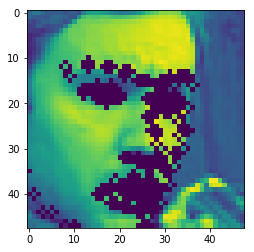

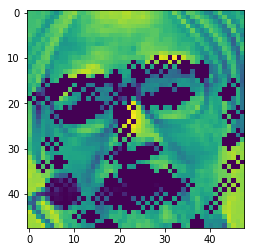

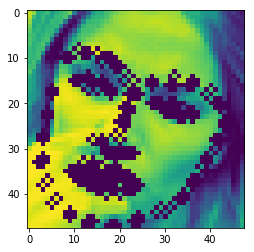

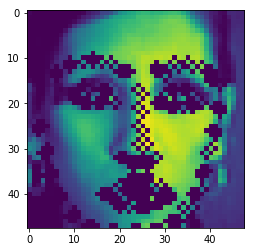

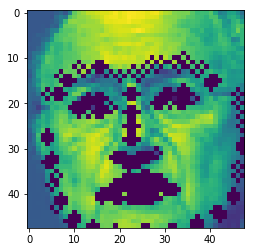

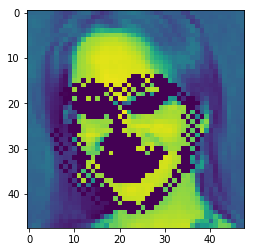

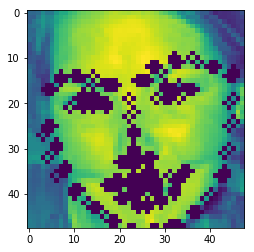

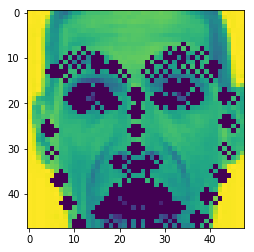

In [77]:
for image in images:
    detections = detector(image, 1)
    for index, d in enumerate(detections):
        shape = predictor(image, d) #Get coordinates
        for i in range(1,68): #There are 68 landmark points on each face
            cv.circle(image, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=1)
            
        plt.imshow(image)
        plt.show()